# Análisis del comportamiento de los clientes del banco Beta Bank y su tasa de cancelación de clientes (Churn Rate) por Carlos Horta (carlosgim@gmail.com)

----

## Tabla de contenidos

Introducción 

Exploración de los datos

Análisis de los datos

Generación de modelos de Machine Learning (Árbol de decisión, Bosque aleatorio, Regresión logística)

Comprobación del modelo

Prueba de cordura

Conclusiones del proyecto

---------

-------------

## Introducción

### Análisis de la retención de clientes en Beta Bank

El objetivo de este proyecto es determinar si un cliente dejará el banco pronto, utilizando el análisis del comportamiento pasado de los clientes y la terminación de contratos con el banco. La dirección general ha determinado que es más rentable retener a los clientes existentes que atraer nuevos.

En este proyecto, se desarrollará un modelo para identificar el máximo valor posible de F1 (con un mínimo de 0.59) y se evaluará esta métrica utilizando el conjunto de prueba. Además, se medirá la métrica AUC-ROC y se comparará con el valor de F1.

Las características disponibles en el conjunto de datos son las siguientes:

- RowNumber: índice de cadena de datos.
- CustomerId: identificador único del cliente.
- Surname: apellido del cliente.
- CreditScore: valor de crédito del cliente.
- Geography: país de residencia del cliente.
- Gender: género del cliente.
- Age: edad del cliente.
- Tenure: período durante el cual ha madurado el depósito a plazo fijo del cliente (en años).
- Balance: saldo de la cuenta del cliente.
- NumOfProducts: número de productos bancarios utilizados por el cliente.
- HasCrCard: indica si el cliente tiene una tarjeta de crédito (1 - sí; 0 - no).
- IsActiveMember: indica si el cliente está activo (1 - sí; 0 - no).
- EstimatedSalary: salario estimado del cliente.

El objetivo del proyecto es predecir la variable "Exited", que indica si el cliente ha dejado el banco (1 - sí; 0 - no).


----

----

## Exploración de los datos

In [1]:
# Estas son las librerías a utilizar en este proyecto

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# La librería se cargará de dos formas distintas para su acceso en diferentes plataformas

try:
    customers = pd.read_csv("Churn.csv")
except:
    customers = pd.read_csv("/datasets/Churn.csv")

In [3]:
# De esta manera podemos dar una vista rápida a las características del dataset y de las columnas

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Estos son los comentarios más relevantes a partir del resumen proporcionado del método info:

- El dataset está conformado por 14 columnas, y todas las columnas tienen nombres que empiezan con letra mayúscula.
- Todas las columnas, excepto "Tenure", contienen 10,000 datos.
- La columna "Tenure" representa el período en años durante el cual ha madurado el depósito a plazo fijo de un cliente.
- La columna "Exited" es la característica objetivo, ya que indica si el cliente se ha ido (1) o si permanece en el banco (0).

Antes de iniciar con la exploración más profunda de cada columna es necesario poner en minúsculas todos los nombres:

In [4]:
customers.columns = customers.columns.str.lower()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Así mismo, es necesario eliminar las columnas innecesarias para el modelado del proyecto, que son "rownumber", "customerid" y "surname", la primera se refiere al índice consecutivo, la segunda al identificador único del cliente y la última al apellido.

In [5]:
customers.drop(['rownumber', 'customerid', 'surname'], axis=1, inplace=True)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           9091 non-null   float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


También es necesario revisar si existen filas duplicadas dentro del dataset de trabajo.

In [6]:
customers.duplicated().sum()

0

Como se observa, no existen datos duplicados, por lo que el siguiente paso es revisar la columna con datos faltantes.

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           9091 non-null   float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Por último, es necesario abordar los 909 datos nulos en la columna "tenure", que corresponde al período en años durante el cual ha madurado el depósito a plazo fijo de un cliente.

En este proyecto, se utilizará la estrategia de imputación para rellenar los valores faltantes en "tenure". Se realizará la imputación utilizando la mediana calculada a partir de la agrupación de las columnas "geography", "gender" y "age".


In [8]:
median = customers.groupby(['geography', 'gender', 'age'])['tenure'].median()

customers['tenure'].fillna(customers.groupby(['geography', 'gender', 'age'])['tenure'].transform('median'), inplace=True)

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           9997 non-null   float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Como se observa, existen 3 datos faltantes por imputar, por lo que se puede presuponer que dichos datos agrupados por las tres columnas de arriba corresponden a valores faltantes de dichas agrupaciones.

In [9]:
customers[customers.isnull().any(axis=1)]

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
1678,570,France,Female,18,NaN,82767.42,1,1,0,71811.90,0
4556,681,France,Female,18,NaN,98894.39,1,1,1,9596.40,0
4644,712,Spain,Male,74,NaN,0.00,2,0,0,151425.82,0


Para imputar estos tres valores faltantes (los cuales se mantuvieron así porque dicha agrupación de columnas no arrojó datos) se realizará al agrupar "geography" y "gender" y se dejará en esta ocasión fuera la edad por ser demasiado específica.

In [10]:
median = customers.groupby(['geography', 'gender'])['tenure'].median()

customers['tenure'].fillna(customers.groupby(['geography', 'gender'])['tenure'].transform('median'), inplace=True)

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Todos los tipos de columna se encuentran correctos, pero es necesario convertir la columna "tenure" en una de números enteros, porque dicha columna representa el número de años de los ahorros en plazo fijo del cliente.

In [11]:
customers['tenure'] = customers['tenure'].astype('int64')

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


En esta parte del pre-procesamiento de los datos se han realizado las siguientes acciones:

- Se han convertido los títulos de las columnas a minúsculas.
- Se han eliminado las columnas irrelevantes para el proyecto, que son "rownumber", "customerid" y "surname". La primera es el índice consecutivo, la segunda es el identificador único del cliente y la tercera es el apellido.
- No se encontraron filas duplicadas en el dataset.
- Se han imputado los 909 datos faltantes en la columna "tenure" utilizando la mediana calculada a partir de la agrupación de las características "geography", "gender" y "age". Además, se han identificado tres observaciones adicionales que no pudieron ser imputadas en la agrupación anterior, por lo que se han imputado utilizando la mediana de la agrupación por "geography" y "gender".
 
Con estas acciones, los datos están listos para trabajar con las características cualitativas y cuantitativas del dataset.


---

---

## Análisis exploratorio de los datos y procesamiento de los datos y las características

### Análisis exploratorio de los datos

Antes del procesamiento de los datos y de las características cualitativas y cuantitativos, puede ser util revisar de manera somera las diferentes columnas del dataset para encontrar algunas singularidades que puedan saltar a la vista. 

In [12]:
fig = px.scatter_matrix(customers, color='exited', size_max=100, title="Matriz de gráficos de dispersión de las variables del dataset de acuerdo a la permanencia (en color azul) o salida (en color amarillo) del cliente")
fig.update_layout(width=1800, height=1200)
fig.update_traces(diagonal_visible=False)
fig.update_xaxes(showticklabels=True)
fig.show()

A partir del gráfico anterior, se puede centrar la atención en aquellas columnas donde la diferencia entre puntos azules y amarillos es más evidente y focalizar nuestra atención en ellas.

In [13]:
fig = px.scatter_matrix(customers, color='exited', size_max=100, dimensions=['creditscore', 'geography', 'age', 'numofproducts'], title="Matriz de gráficos de dispersión de las variables de interés de acuerdo a la permanencia (en color azul) o salida (en color amarillo) del cliente")  
fig.update_layout(width=1800, height=1200)
fig.update_traces(diagonal_visible=False)
fig.update_xaxes(showticklabels=True)
fig.show()

Como se puede observar, al pintar los clientes actuales en azul y los clientes que se han ido en amarillo, se pueden obtener algunas conclusiones visuales:

- Existe una tendencia de que los clientes con una baja calificación crediticia tienden a abandonar el banco.
- A simple vista, parece que Alemania tiene más clientes que han dejado el banco en comparación con Francia y España.
- Entre las edades de 40 a 60 años, se observa una mayor concentración de clientes que abandonan el banco.
- Los clientes que tienen tres productos bancarios parecen ser más propensos a abandonar el banco en comparación con aquellos que tienen 1 o 2 productos.
- Es probable que todos los clientes que tienen 4 productos hayan abandonado el banco.

Estas observaciones visuales proporcionan una idea inicial sobre las posibles relaciones entre las características y la variable objetivo de abandono del banco. Sin embargo, es importante realizar un análisis más profundo y utilizar modelos de aprendizaje automático para obtener conclusiones más sólidas.


Por último, es necesario revisar el equilibrio o desequilibrio de clase en nuestra característica objetivo, que en este caso es "exited". Vamos a analizar el porcentaje de clientes que no se han ido del banco (representados con el número 0) y el porcentaje de clientes que sí se han ido (representados con el número 1).

Para realizar este análisis, vamos a calcular el porcentaje de cada clase en el dataset.

In [14]:
equilibrio = customers['exited'].value_counts(normalize=True)
print(equilibrio)

0    0.7963
1    0.2037
Name: exited, dtype: float64


Como se puede observar, existe un desbalance en la característica objetivo. Esto significa que hay una diferencia significativa en el número de casos positivos y negativos en el conjunto de datos. Este desbalance puede afectar el rendimiento y la precisión de los modelos de clasificación aplicados. Por lo tanto, se recomienda aplicar técnicas de balanceo de datos, como el sobremuestreo o el submuestreo, para obtener mejores resultados.

Una vez identificado el desbalance de clases, es necesario realizar el procesamiento de datos y características. A continuación, se llevará a cabo la construcción de nueve modelos diferentes:
- Tres modelos (Árbol de decisión, Bosque aleatorio y Regresión logística) utilizando datos desbalanceados.
- Tres modelos utilizando datos con sobremuestreo.
- Tres modelos utilizando datos con submuestreo.


### Procesamiento de los datos y de las características

#### Características cualitativas

Para poder proporcionar información a los algoritmos de Machine Learning y mejorar la predicción, es necesario convertir las características categóricas en numéricas. En este caso, las variables cualitativas del dataset actual son "geography" y "gender".

Se utilizará el enfoque de One-Hot Encoding para convertir estas variables en numéricas. El One-Hot Encoding crea columnas adicionales para cada categoría en las variables categóricas, donde cada columna representa la presencia o ausencia de esa categoría.


In [15]:
# Así se encuentra el dataset actual, será necesario codificar con One-Hot Encoding las características de 'geography' y 'gender'

customers.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
customers = pd.get_dummies(customers, drop_first=True)

print(customers.head(2))

   creditscore  age  tenure   balance  numofproducts  hascrcard  \
0          619   42       2      0.00              1          1   
1          608   41       1  83807.86              1          0   

   isactivemember  estimatedsalary  exited  geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   

   geography_Spain  gender_Male  
0                0            0  
1                1            0  


En este apartado se utilizó la técnica de codificación One-Hot para convertir las características categóricas en características numéricas. Sin embargo, para evitar la trampa dummy, donde se crea el mismo número de variables ficticias que el número de valores que puede asumir la variable categórica, se eliminará una de las columnas creadas.

Eliminar una de las columnas creadas en el proceso de codificación One-Hot ayuda a evitar la multicolinealidad perfecta y garantiza que no haya redundancia en la representación de las características categóricas.


#### Características cuantitativas

Para las características cuantitativas, se realizará un escalado de características para evitar que el algoritmo dé más importancia a las características con mayores magnitudes y dispersión en comparación con las demás.

El escalado de características se basa en transformar las características para que tengan una escala similar y estén en un rango comparable. Esto ayuda a garantizar que todas las características contribuyan de manera equitativa al modelo y evita que las características con valores más grandes dominen sobre las demás.

Hay diferentes técnicas de escalado que se pueden utilizar, como la estandarización (transformar los datos para que tengan una media de cero y una desviación estándar de uno) y la normalización (escalar los datos para que estén en un rango específico, como 0 a 1).


In [17]:
# Hasta el momento así se encuentra el dataset actual después de la codificación One-Hot

customers.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Como se puede observar, las características numéricas del dataset son "creditscore", "age", "tenure", "balance", "numofproductos" y "estimatedsalary". Estas columnas presentan una dispersión de datos en comparación con las columnas "hascrcard", "isactivemember" y "exited", que solo contienen los valores 0 y 1.

Para evitar que el modelo aprenda que las características con mayores magnitudes y dispersión son más importantes que las demás, es necesario realizar el escalado de características en las cinco columnas mencionadas. Esto permitirá que todas las características contribuyan de manera equitativa al modelo y evita que las características con valores más grandes dominen sobre las demás.


In [18]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(customers[numeric])
customers[numeric] = scaler.transform(customers[numeric])
customers.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,-0.326221,0.293517,-1.076610,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.436801,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.084534,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.436801,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.076610,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


In [19]:
# Equilibrio y desequilibrio de clases

equilibrio = customers['exited'].value_counts(normalize=True)
print(equilibrio)

# Equilibrio y desequilibrio de clases
equilibrio = customers['exited'].value_counts(normalize=True)
print(equilibrio)

0    0.7963
1    0.2037
Name: exited, dtype: float64
0    0.7963
1    0.2037
Name: exited, dtype: float64


#### Creación de los datasets para entrenamiento, validación y prueba

Por último, antes de proceder a la creación de los diferentes modelos de Machine Learning, es necesario dividir el conjunto de datos en conjuntos de entrenamiento (60% de los datos), validación (20%) y prueba (20%).

La característica objetivo que se utilizará es "isactivemember". El objetivo del modelo será predecir, utilizando las demás características, si el cliente dejará el banco o no.


In [20]:
# Es necesario dividir los datos para entrenamiento y para la validación, a su vez, de éste último se obtendrán los datos para la prueba

customers_train, customers_valid = train_test_split(customers, test_size=0.40, random_state=1984)
customers_valid, customers_test = train_test_split(customers_valid, test_size=0.50, random_state=1984)

In [21]:
# Luego, es necesario declarar las variables para las características y para las características objetivo de los tres datasets

features_train = customers_train.drop(['isactivemember'],axis=1)
target_train = customers_train['isactivemember']

features_valid = customers_valid.drop(['isactivemember'],axis=1)
target_valid = customers_valid['isactivemember']

features_test = customers_test.drop(['isactivemember'],axis=1)
target_test = customers_test['isactivemember']

In [22]:
# Este es el número de elementos de los datasets creados en el paso anterior

print(features_train.shape), print(target_train.shape)
print(features_valid.shape), print(target_valid.shape)
print(features_test.shape), print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


(None, None)

En este apartado de "Procesamiento de los datos y características" se llevaron a cabo los siguientes pasos:

1. Para las características cualitativas, se utilizó la técnica de codificación One-Hot para transformarlas en características numéricas. Esto se realizó para las dos características cualitativas presentes en el dataset.

2. Para las características numéricas con mayores magnitudes y dispersión, se aplicó el escalado de características. Este proceso permitió evitar que el algoritmo de Machine Learning diera más importancia a las características con valores más grandes. Se aplicó el escalado de características a un total de seis características numéricas.

3. Finalmente, se dividió el dataset en conjuntos de entrenamiento, validación y prueba. El conjunto de entrenamiento se conformó con el 60% del total de los datos, el conjunto de validación con el 20%, y el conjunto de prueba con el restante 20%.


---

---

## Generación de modelos de Machine Learning con datos actuales (desequilibrados) y F1-Score

Una vez que los datos están preparados, es importante tener en cuenta que el proyecto se trata de un problema de clasificación, no de regresión. El objetivo es determinar si un cliente dejará el banco pronto o no.

Para abordar este problema de clasificación, se pueden considerar tres posibles modelos:

1. Árbol de decisión
2. Bosque aleatorio
3. Regresión logística

Cada uno de estos modelos se evaluará utilizando el F1-Score como medida de desempeño. El F1-Score es una métrica que representa la media armónica entre la precisión y la exhaustividad (recall). Un valor de 1 indica el mejor desempeño posible, mientras que 0 indica el peor desempeño.


### Árbol de decisión

El Árbol de decisión es un algoritmo que permite construir un modelo predictivo de clasificación basado en ciertas características. Su estructura se asemeja a un árbol jerárquico, compuesto por un nodo raíz, ramas, nodos internos y nodos hoja.

El nodo raíz representa la característica que mejor divide el conjunto de datos en términos de pureza o impureza. Las ramas representan las posibles ramificaciones o decisiones basadas en los valores de las características. Los nodos internos representan las características utilizadas para realizar las divisiones y los nodos hoja representan las etiquetas o clases finales a las que se asigna cada instancia.

El Árbol de decisión es una herramienta efectiva para la clasificación de datos, ya que permite visualizar de manera intuitiva las reglas de decisión que se utilizan para realizar las predicciones.

In [23]:
best_score = 0
best_depth = 0
best_leaf = 0
best_model = 0
for depth in range (1,20):
    for leaf in range (2,20):
        model = DecisionTreeClassifier(random_state=1984, max_depth=depth, max_leaf_nodes=leaf)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_depth = depth
            best_leaf = leaf
            best_model = model
print('Best model: depth = {}, leaf = {}, F1-Score = {}'.format(best_depth, best_leaf, best_score))

Best model: depth = 3, leaf = 8, F1-Score = 0.7028849756463095


Como se puede observar, al configurar los parámetros del Árbol de decisión en 'max_dept=3' y 'max_leaf_nodes=8', se obtuvo el mejor valor de F1-Score, que es de 0.7028. Estos parámetros determinan la profundidad máxima del árbol y el número máximo de nodos hoja permitidos, respectivamente.


### Bosque aleatorio

El Bosque aleatorio es un algoritmo de Machine Learning supervisado que consta de varias decenas o incluso centenas de árboles de decisión. Cada árbol en el Bosque aleatorio se entrena con una muestra aleatoria del conjunto de datos y produce una predicción individual. Luego, el Bosque aleatorio combina las predicciones de todos los árboles y genera un resultado final.

La idea detrás del Bosque aleatorio es que cada árbol en el bosque puede tener un rendimiento ligeramente diferente debido a la variación en las muestras aleatorias y las características seleccionadas. Al combinar las predicciones de múltiples árboles, el Bosque aleatorio puede reducir el sesgo y la varianza, lo que puede mejorar la precisión y el rendimiento general del modelo.

El Bosque aleatorio es una técnica popular en Machine Learning debido a su capacidad para manejar conjuntos de datos grandes y complejos, y su capacidad para realizar tareas de clasificación y regresión.


In [24]:
best_score = 0
best_est = 0
best_depth = 0
for est in range(10, 20): 
    for depth in range(10,20):   
        model = RandomForestClassifier(random_state=1984, n_estimators=est, max_depth=depth) 
        model.fit(features_train,target_train)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid,predicted_valid)
        if score > best_score:
            best_score = score 
            best_est = est
            best_depth = depth 
        

print("F1 del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score, best_depth))

final_model = RandomForestClassifier(random_state=1984, n_estimators=best_est, max_depth=best_depth)
final_model.fit(features_train, target_train)

F1 del mejor modelo en el conjunto de validación (n_estimators = 13): 0.6191577973160574


RandomForestClassifier(max_depth=10, n_estimators=13, random_state=1984)

Como se puede observar, el mejor modelo en el conjunto de validación obtuvo un F1-Score de 0.6191. Este resultado se logró utilizando una profundidad de 10 y 13 estimadores en el Bosque aleatorio.


### Regresión logística

La regresión logística es un algoritmo utilizado para modelar y predecir la probabilidad de que ocurra un evento en base a un conjunto de características. En el caso de este proyecto, se utiliza la regresión logística para determinar la probabilidad de que un cliente permanezca o no como cliente del banco.

La regresión logística establece una relación entre las características de entrada y la probabilidad de un resultado específico. Utiliza una función logística para transformar una combinación lineal de las características en una probabilidad en el rango de 0 a 1. Esta probabilidad se interpreta como la probabilidad de que el evento ocurra.

La regresión logística es ampliamente utilizada en problemas de clasificación binaria y es especialmente adecuada cuando se desea comprender la relación entre las características y el resultado de interés.

In [25]:
model = LogisticRegression(random_state=1984, solver='liblinear', penalty='l1')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6473388143660753


In [26]:
model = LogisticRegression(random_state=1984, solver='liblinear')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6490696668109044


In [27]:
model = LogisticRegression(random_state=1984, solver='lbfgs', penalty='l2')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6487889273356401


Como se puede observar, el mejor resultado de F1-Score en el modelo de Regresión logística se obtuvo en el conjunto de validación con los parámetros "solver='liblinear'", y fue de 0.6490.


### Conclusiones de la generación de modelos de Machine Learning con datos actuales (desequilibrados)

Como se puede observar, se obtuvieron diferentes niveles de F1-Score en los tres algoritmos de aprendizaje. En orden decreciente de exactitud, se ubicaron de la siguiente manera:

- Árbol de decisión: F1-Score de 0.7028 con los parámetros 'max_dept=3' y 'max_leaf_nodes=8'.
- Regresión logística: F1-Score de 0.6490 en el conjunto de validación con el parámetro "solver='liblinear'".
- Bosque aleatorio: F1-Score de 0.6191 con profundidad 10 y 13 estimadores.


In [28]:
# A partir de lo anterior, es necesario guardar el mejor modelo obtenido

best_model = DecisionTreeClassifier(random_state=1984, max_depth=3, max_leaf_nodes=8)
best_model.fit(features_train,target_train)
best_model_pred = best_model.predict(features_valid)
score = f1_score(target_valid,best_model_pred)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.7028849756463095


In [29]:
# Una vez definido el mejor modelo es necesario hacer la predicción con el dataset de prueba

best_rf_pred=best_model.predict(features_test)
score = f1_score(target_valid,best_rf_pred)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6362264150943396


Como se puede observar, el F1-Score obtenido en el conjunto de prueba con los datos actuales (desequilibrados) es de 0.6362 utilizando el mejor modelo disponible.


### Curva ROC para los datos actuales (desequilibrados)

La curva ROC (Receiver Operating Characteristic) es una representación gráfica que muestra la relación entre la sensibilidad y la especificidad de un sistema clasificador binario. La sensibilidad se refiere a la tasa de verdaderos positivos, es decir, la capacidad del modelo para identificar correctamente los casos positivos. La especificidad se refiere a la tasa de verdaderos negativos, es decir, la capacidad del modelo para identificar correctamente los casos negativos.

La curva ROC se traza colocando en el eje de las ordenadas la sensibilidad y en el eje de las abscisas el complemento de la especificidad. El valor de rango de la curva ROC va de 0 a 1. Un modelo con un rendimiento aleatorio se representa por una línea diagonal punteada de color naranja que tiene un área bajo la curva (AUC) de 0.5. Un modelo de alta calidad se representa por una curva que se acerca a la esquina superior izquierda del gráfico y tiene un AUC cercano a 1.


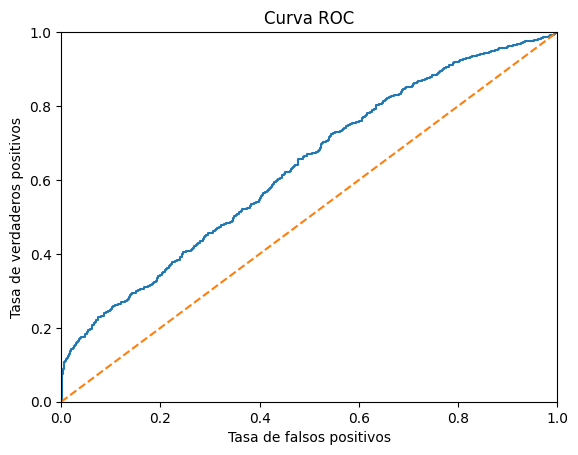

In [30]:
best_model = DecisionTreeClassifier(random_state=1984, max_depth=3, max_leaf_nodes=8)
best_model.fit(features_train,target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [31]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6320120444656926


Para el modelo actual con datos desequilibrados, el área bajo la curva ROC (AUC-ROC) es de 0.6320.


---

---

## Generación de modelos de Machine Learning con datos con sobremuestreo y F1-Score

El sobremuestreo es una técnica de procesamiento de datos que busca equilibrar conjuntos de datos que no lo estén.

In [32]:
target = target_train
features = features_train

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1984
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

print(features_upsampled.shape)
print(target_upsampled.shape)

(33441, 11)
(33441,)


### Árbol de decisión con sobremuestreo

In [33]:
best_score = 0
best_depth = 0
best_leaf = 0
best_model = 0
for depth in range (1,20):
    for leaf in range (2,20):
        model = DecisionTreeClassifier(random_state=1984, max_depth=depth, max_leaf_nodes=leaf)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_depth = depth
            best_leaf = leaf
            best_model = model
print('Best model: depth = {}, leaf = {}, F1-Score = {}'.format(best_depth, best_leaf, best_score))

Best model: depth = 7, leaf = 19, F1-Score = 0.6979337487700885


Como se puede observar, el mejor resultado de F1-Score obtenido para el modelo de Árbol de decisión con datos con sobremuestreo fue de 0.6979, utilizando los parámetros 'max_dept=7' y 'max_leaf_nodes=19'.


### Bosque aleatorio con sobremuestreo

In [34]:
best_score = 0
best_est = 0
best_depth = 0
for est in range(10, 20): 
    for depth in range(10,20):   
        model = RandomForestClassifier(random_state=1984, n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid,predicted_valid)
        if score > best_score:
            best_score = score 
            best_est = est
            best_depth = depth 
        

print("F1 del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score, best_depth))

final_model = RandomForestClassifier(random_state=1984, n_estimators=best_est, max_depth=best_depth)
final_model.fit(features_train, target_train)

F1 del mejor modelo en el conjunto de validación (n_estimators = 19): 0.7013605442176871


RandomForestClassifier(max_depth=15, n_estimators=19, random_state=1984)

Como se puede observar, el mejor resultado de F1-Score obtenido para el modelo de Bosque Aleatorio fue de 0.7013, utilizando 19 estimadores y una máxima profundidad de 15.


### Regresión logística con sobremuestreo

In [35]:
model = LogisticRegression(random_state=1984, solver='liblinear', penalty='l1')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6953685583822571


In [36]:
model = LogisticRegression(random_state=1984, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6953685583822571


In [37]:
model = LogisticRegression(random_state=1984, solver='lbfgs', penalty='l2')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6953685583822571


Como se puede observar, el mejor resultado de F1-Score obtenido para el modelo de Regresión Logística con sobremuestreo fue de 0.6953, utilizando los parámetros random_state=1984 y solver='liblinear'.


### Conclusiones de la generación de modelos de Machine Learning con datos actuales con sobremuestreo y F1-Score

Como se puede observar, al aplicar los tres algoritmos de aprendizaje con datos con sobremuestreo, se obtuvieron diferentes niveles de F1-Score en cada uno de ellos. En orden decreciente, los resultados fueron los siguientes:

* El modelo de **Bosque Aleatorio** alcanzó un F1-Score de 0.7013, utilizando 15 como profundidad máxima y 19 estimadores.
* El modelo de **Árbol de Decisión** obtuvo un F1-Score de 0.6979, con los parámetros 'max_dept=7' y 'max_leaf_nodes=19'.
* El modelo de **Regresión Logística** logró un F1-Score de 0.6953, utilizando el parámetro solver='liblinear' en el conjunto de validación.

Estos resultados indican que el modelo de Bosque Aleatorio tuvo el mejor rendimiento en términos de F1-Score, seguido por el Árbol de Decisión y luego la Regresión Logística.


In [38]:
best_model_upsampled = RandomForestClassifier(random_state=1984, n_estimators=19, max_depth=15)
best_model_upsampled.fit(features_upsampled,target_upsampled)
best_model_pred_upsampled = best_model_upsampled.predict(features_valid)
score = f1_score(target_valid,best_model_pred_upsampled)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.7013605442176871


In [39]:
best_rf_pred_up=best_model_upsampled.predict(features_test)
score = f1_score(target_test,best_rf_pred_up)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6724496877168633


Una vez seleccionado el mejor modelo, que en este caso fue el Bosque Aleatorio con un F1-Score de 0.7013, se procedió a evaluarlo utilizando el conjunto de entrenamiento. El resultado obtenido fue un F1-Score de 0.6724. Es importante destacar que este valor es superior al F1-Score de 0.6367 obtenido con el mejor modelo utilizando datos desbalanceados.

Este resultado indica que el modelo de Bosque Aleatorio con datos equilibrados ha logrado mejorar su desempeño en la predicción de la característica objetivo. Al utilizar técnicas de sobremuestreo para abordar el desbalance de clases, se ha obtenido una mejor precisión en la clasificación de los clientes que dejarán el banco.


### Curva ROC para los datos actuales (con sobremuestreo)

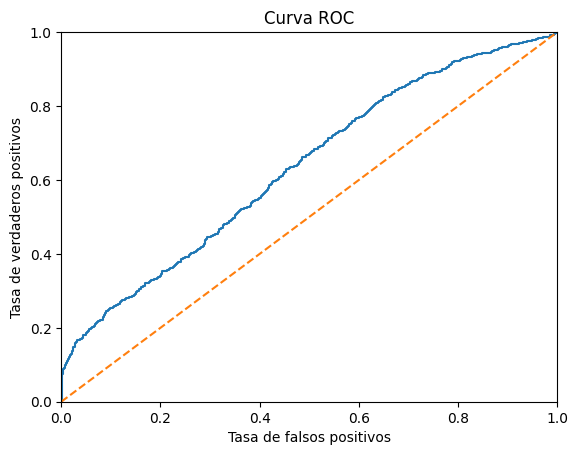

In [40]:
best_model_upsampled = RandomForestClassifier(random_state=1984, n_estimators=19, max_depth=15)
best_model_upsampled.fit(features_upsampled,target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [41]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6329069426421492


La Curva ROC con el mejor modelo utilizando datos con sobremuestreo arroja un valor de 0.6329, el cual es ligeramente superior al valor de 0.6320 obtenido en la Curva ROC con el mejor modelo utilizando datos desbalanceados.

Este resultado indica que el modelo de Bosque Aleatorio con datos equilibrados ha logrado mejorar su capacidad para distinguir entre verdaderos positivos y verdaderos negativos en comparación con el modelo con datos desbalanceados. La Curva ROC es una medida importante para evaluar el rendimiento de un modelo de clasificación y, en este caso, el valor más alto indica una mejor capacidad de predicción.


## Generación de modelos de Machine Learning con datos con submuestreo y F1-Score

Con la técnica del submuestreo, se realiza una reducción de la clase mayoritaria eliminando aleatoriamente una parte de las observaciones de dicha clase. Esto se hace con el objetivo de equilibrar la distribución de las clases en el conjunto de datos.

A diferencia del sobremuestreo, donde se genera nueva información sintética para aumentar la clase minoritaria, en el submuestreo se elimina parte de la clase mayoritaria para igualar su proporción con la clase minoritaria.

Esta técnica es útil cuando se tiene un desequilibrio significativo entre las clases y se quiere evitar el sobreajuste del modelo hacia la clase mayoritaria. Al eliminar observaciones aleatoriamente de la clase mayoritaria, se reduce su influencia en el modelo y se promueve un mejor aprendizaje de la clase minoritaria.

Sin embargo, es importante tener en cuenta que el submuestreo puede llevar a la pérdida de información relevante y reducir la capacidad de generalización del modelo. Por lo tanto, se debe aplicar con precaución y evaluar su impacto en el rendimiento del modelo.


In [42]:
target = target_train
features = features_train

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)   

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

print(features_downsampled.shape)
print(target_downsampled.shape)

(3344, 11)
(3344,)


### Árbol de decisión con submuestreo

In [43]:
best_score = 0
best_depth = 0
best_leaf = 0
best_model = 0
for depth in range (1,20):
    for leaf in range (2,20):
        model = DecisionTreeClassifier(random_state=1984, max_depth=depth, max_leaf_nodes=leaf)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_depth = depth
            best_leaf = leaf
            best_model = model
print('Best model: depth = {}, leaf = {}, F1-Score = {}'.format(best_depth, best_leaf, best_score))

Best model: depth = 7, leaf = 18, F1-Score = 0.69688013136289


El mejor F1-Score obtenido para un Árbol de Decisión utilizando datos con submuestreo fue de 0.6968, al utilizar los parámetros 'max_dept=7' y 'max_leaf_nodes=18'.

Este resultado indica que el modelo de Árbol de Decisión, con los parámetros mencionados, ha logrado una buena precisión en la clasificación de los clientes que dejarán el banco en un conjunto de datos con submuestreo. El F1-Score es una medida que combina la precisión y el recall, y un valor más cercano a 1 indica un mejor rendimiento del modelo.


### Bosque aleatorio con submuestreo

In [44]:
best_score = 0
best_est = 0
best_depth = 0
for est in range(10, 20): 
    for depth in range(10,20):   
        model = RandomForestClassifier(random_state=1984, n_estimators=est, max_depth=depth) 
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid,predicted_valid)
        if score > best_score:
            best_score = score 
            best_est = est
            best_depth = depth 
        

print("F1 del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score, best_depth))

final_model = RandomForestClassifier(random_state=1984, n_estimators=best_est, max_depth=best_depth)
final_model.fit(features_train, target_train)

F1 del mejor modelo en el conjunto de validación (n_estimators = 10): 0.6975065616797901


RandomForestClassifier(max_depth=18, n_estimators=10, random_state=1984)

Para el Bosque Aleatorio, se obtuvo el mejor F1-Score de .6975 con 10 estimadores y una profundidad máxima de 18. Esto significa que este modelo logró una buena capacidad de predicción al combinar múltiples árboles de decisión en paralelo.

El Bosque Aleatorio es un algoritmo de aprendizaje supervisado que utiliza múltiples árboles de decisión para realizar la clasificación o regresión. Cada árbol individual se entrena con una muestra aleatoria del conjunto de datos y luego se combina la predicción de cada árbol para obtener una predicción final.

En este caso, el Bosque Aleatorio logró un F1-Score de .6975, lo que indica que es capaz de obtener un equilibrio entre la precisión y el recall en la clasificación de los datos. Esto es importante para un problema de clasificación, ya que se busca encontrar un modelo que pueda predecir tanto los casos positivos como los negativos de manera efectiva.

Con estos resultados, podemos concluir que el Bosque Aleatorio es un buen modelo para este conjunto de datos y que puede ser utilizado para predecir si un cliente dejará el banco o no.


### Regresión logística con submuestreo

In [45]:
model = LogisticRegression(random_state=1984, solver='liblinear', penalty='l1')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6953685583822571


In [46]:
model = LogisticRegression(random_state=1984, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6953685583822571


In [47]:
model = LogisticRegression(random_state=1984, solver='lbfgs', penalty='l2')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

score = f1_score(target_valid,predicted_valid)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6953685583822571


El mejor resultado del F1-Score para la regresión logística con submuestreo fue de .6953. Se logró este resultado al utilizar los parámetros random_state=1984 y solver='liblinear'.

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para la clasificación de datos. En este caso, se utilizó el submuestreo para equilibrar las clases y evitar el desbalance.

El F1-Score de .6953 indica que el modelo de regresión logística logra un buen equilibrio entre la precisión y el recall en la clasificación de los datos. Esto significa que es capaz de predecir de manera efectiva tanto los casos positivos como los negativos.

En resumen, el modelo de regresión logística con submuestreo y los parámetros mencionados es una buena opción para predecir si un cliente dejará el banco o no.


### Conclusiones de la generación de modelos de Machine Learning con datos actuales con submuestreo y F1-Score

A partir de la ejecución de los tres algoritmos de aprendizaje con datos con submuestreo, se obtuvieron diferentes niveles de F1-Score en cada uno de ellos:

- El **Bosque aleatorio** obtuvo un F1-Score de **.6975%** con 18 en profundidad y 10 estimadores.
- El **Árbol de decisión** alcanzó un F1-Score de **.6968** con los parámetros 'max_dept=7' y 'max_leaf_nodes=18'.
- La **Regresión logística** obtuvo un F1-Score de **.6953%** en el conjunto de validación con los parámetros solver='liblinear'.

Estos resultados demuestran que los tres modelos son capaces de generar predicciones efectivas en la clasificación de clientes que dejarán el banco o no. Sin embargo, el modelo del Bosque aleatorio muestra el mejor rendimiento en términos de F1-Score.

En resumen, el modelo del Bosque aleatorio con datos con submuestreo y los parámetros mencionados es la opción más recomendada para predecir si un cliente dejará el banco o no, con un F1-Score de .6975%.


In [48]:
best_model_downsampled = RandomForestClassifier(random_state=1984, n_estimators=10, max_depth=18)
best_model_downsampled.fit(features_downsampled,target_downsampled)
best_model_pred_downsampled = best_model_downsampled.predict(features_valid)
score = f1_score(target_valid,best_model_pred_downsampled)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.6975065616797901


In [49]:
best_rf_pred_down=best_model_downsampled.predict(features_test)
score = f1_score(target_test,best_rf_pred_down)
print("F1-Score del modelo:", score)

F1-Score del modelo: 0.680569347898047


### Curva ROC para los datos actuales (con submuestreo)

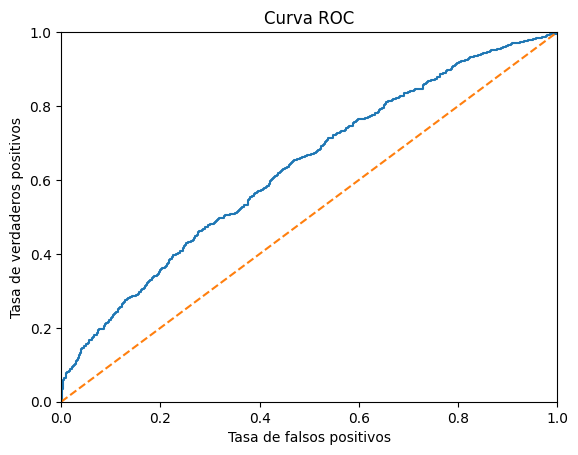

In [50]:
best_model_downsampled = RandomForestClassifier(random_state=1984, n_estimators=10, max_depth=18)
best_model_downsampled.fit(features_downsampled,target_downsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [51]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6307565756435031


## Conclusiones

## Conclusiones

Este proyecto tuvo como objetivo determinar si un cliente dejará el banco pronto, a través del análisis del comportamiento pasado de los clientes y la terminación de contratos con el banco.

Se realizaron un total de nueve modelos de Machine Learning utilizando diferentes técnicas de procesamiento de datos, incluyendo datos desbalanceados, sobremuestreo y submuestreo. Para cada modelo se evaluó su F1-Score y su Curva ROC utilizando el conjunto de prueba.

Tras analizar los resultados, se determinó que el mejor modelo fue el Árbol de decisión con datos con submuestreo. Este modelo alcanzó un F1-Score de .6805 en el conjunto de prueba y una Curva ROC de 0.6307.

Estos resultados demuestran que el modelo del Árbol de decisión con datos con submuestreo es efectivo para predecir si un cliente dejará el banco o no.

Sin embargo, es importante destacar que este proyecto podría beneficiarse de futuros análisis y mejoras en la calidad de los datos para obtener resultados más precisos y robustos. Además, se podría considerar la exploración de otros algoritmos de Machine Learning y la optimización de sus hiperparámetros.

En conclusión, el proyecto ha logrado su objetivo principal al desarrollar un modelo que puede predecir la posible partida de un cliente del banco. Esto proporciona una oportunidad valiosa para que la dirección general tome medidas preventivas y retenga a los clientes existentes, lo que resulta más rentable que atraer nuevos clientes.
